# Ejemplo de ICA

Usando variables aleatorias con distribucion Beta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)

In [2]:
from BSS import ICA, unmixing_error

## Señales originales

In [3]:
# tamaño de las señales 
sample_size = 5000

In [4]:
# Obtener x1
beta_dist_1 = beta(2, 5)
señal_x1 = beta_dist_1.rvs(size = sample_size)

# Obtener x2
beta_dist_2 = beta(5, 2)
señal_x2 = beta_dist_2.rvs(size = sample_size)

# juntar las señales 
señales_originales_x = np.array([señal_x1, señal_x2])
print(f"Shape of signals x: {señales_originales_x.shape}")

Shape of signals x: (2, 5000)


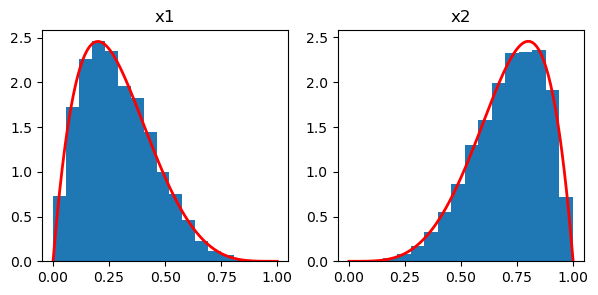

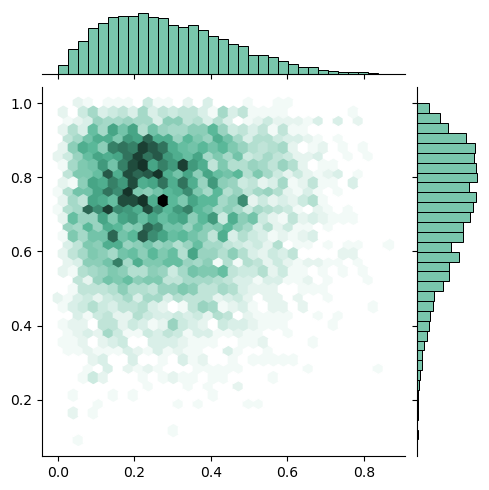

In [5]:
# ver ambas muestras

# 1) hist de ambas señales
fig, ax = plt.subplots(1, 2, figsize = (7, 3))
# x1
ax[0].hist(señal_x1, bins = 15, density=True)
x_plot = np.linspace(0, 1, 100)
ax[0].plot(x_plot, beta_dist_1.pdf(x_plot), 'r-', lw=2)
ax[0].set_title("x1")
# x2
ax[1].hist(señal_x2, bins = 15, density=True)
x_plot = np.linspace(0, 1, 100)
ax[1].plot(x_plot, beta_dist_2.pdf(x_plot), 'r-', lw=2)
ax[1].set_title("x2")
# mostrar
plt.show()

# 2) Conjunta
sns.jointplot(x=señales_originales_x[0], y=señales_originales_x[1], kind="hex", color="#4CB391", height = 5)
plt.show()

## Mezcla

In [6]:
# delimitar la matriz de mezcla
A = np.array([[-2, 1], [3, -5]])

A

array([[-2,  1],
       [ 3, -5]])

Shape of signals y: (2, 5000)


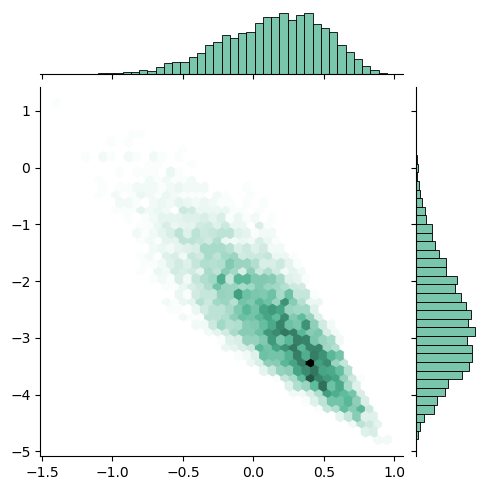

In [7]:
# hacer la mezcla
señales_y = A @ señales_originales_x
print(f"Shape of signals y: {señales_y.shape}")

# ver
sns.jointplot(x=señales_y[0], y=señales_y[1], kind="hex", color="#4CB391", height = 5)
plt.show()

## Estimar señales originales

In [8]:
# hacer ICA
ica = ICA(señales_y)
x_hat = ica.separar_señaes(repeticiones_optimizacion = 20)

C:\Users\diego\anaconda3\envs\ds\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
C:\Users\diego\anaconda3\envs\ds\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


In [9]:
# ver el error de estimacion
error_ica = unmixing_error(A, ica.A_hat)
print(f"Error de estimacion: {error_ica}")

Error de estimacion: 0.10195170453387584


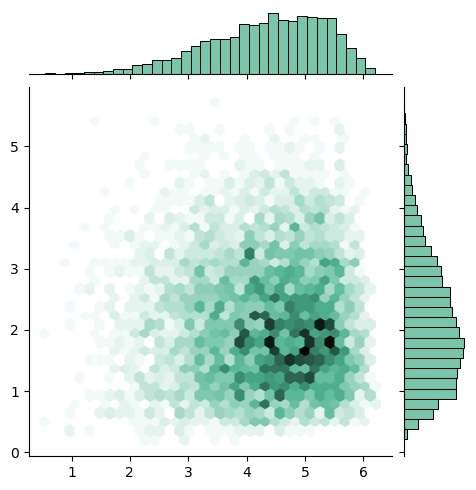

In [10]:
# ver señales estimadas
sns.jointplot(x=x_hat[0], y=x_hat[1], kind="hex", color="#4CB391", height = 5)
plt.show()

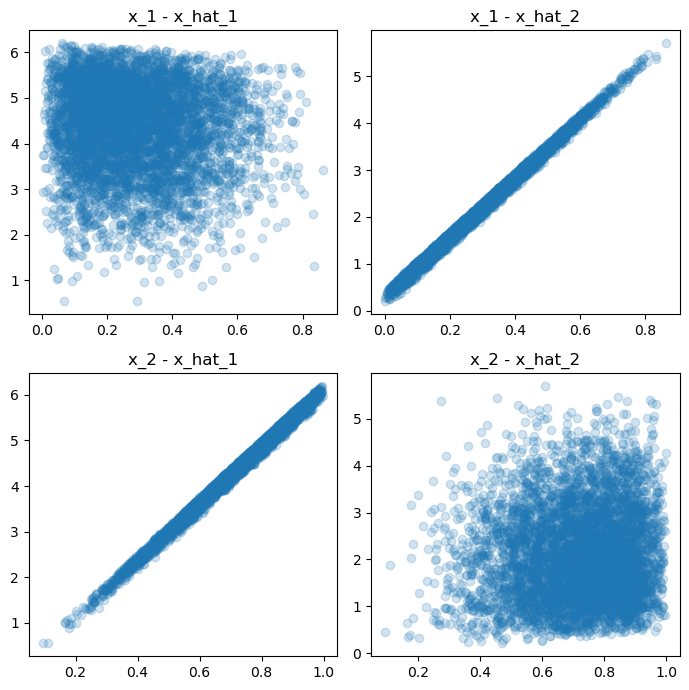

In [11]:
# ver comparacion de originales con estimadas
fig, ax = plt.subplots(2, 2, figsize = (7, 7))
for i in range(2):
    for j in range(2):
        ax[i, j].scatter(señales_originales_x[i], x_hat[j], alpha = 0.2)
        ax[i, j].set_title(f"x_{i+1} - x_hat_{j+1}")
plt.tight_layout()

In [13]:
# hacer match de señales originales con estimadas
x_hat_1 = 1 * x_hat[1]
x_hat_2 = 1 * x_hat[0]

In [14]:
def normalize_to_range(A, B):
    """
    Normaliza el rango de A para que coincida con el de B.
    """
    min_A, max_A = np.min(A), np.max(A)
    min_B, max_B = np.min(B), np.max(B)
    return (A - min_A) / (max_A - min_A) * (max_B - min_B) + min_B

# normalizar entre 0 y 1 (son beta)
x_hat_1 = normalize_to_range(x_hat_1, señal_x1)
x_hat_2 = normalize_to_range(x_hat_2, señal_x2)

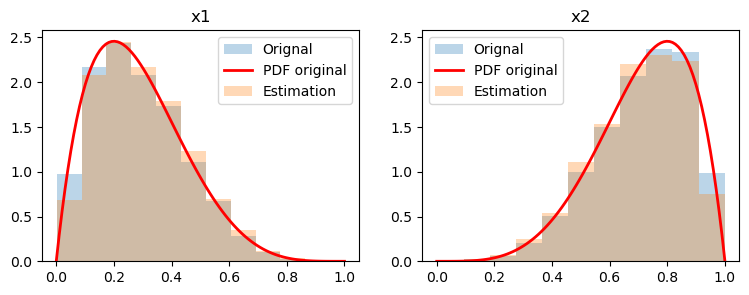

In [15]:
# visualizar originales vs estimadas

fig, ax = plt.subplots(1, 2, figsize = (9, 3))
alpha = 0.3
# x1
ax[0].hist(señal_x1, density=True, alpha = alpha, label = "Orignal")
ax[0].plot(x_plot, beta_dist_1.pdf(x_plot), 'r-', lw=2, label = "PDF original")
ax[0].hist(x_hat_1, density=True, alpha = alpha, label = "Estimation")
ax[0].set_title("x1")
ax[0].legend()
# x2
ax[1].hist(señal_x2, density=True, alpha = alpha, label = "Orignal")
ax[1].plot(x_plot, beta_dist_2.pdf(x_plot), 'r-', lw=2, label = "PDF original")
ax[1].hist(x_hat_2, density=True, alpha = alpha, label = "Estimation")
ax[1].set_title("x2")
ax[1].legend()

plt.show()